# Helper functions

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def create_object_img(image, coordinates, resize=0.7, threshold=200, new_color=100):
    # Extract object from image_1 using coordinates
    obj = image[coordinates[0]:coordinates[1], coordinates[2]:coordinates[3]]
    
    # Resize object
    # obj = cv2.resize(obj, None, fx=resize, fy=resize, interpolation=cv2.INTER_AREA)
    
    # Apply threshold
    obj[obj > threshold] = new_color
    
    plt.imshow(obj, cmap='gray')
    plt.show()

    return obj

def non_max_suppression(boxes, overlapThresh):
    if len(boxes) == 0:
        return []

    if boxes.dtype.kind == "i":
        boxes = boxes.astype("float")

    pick = []

    x1 = boxes[:, 0]
    y1 = boxes[:, 1]
    x2 = boxes[:, 2]
    y2 = boxes[:, 3]

    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    idxs = np.argsort(y2)

    while len(idxs) > 0:
        last = len(idxs) - 1
        i = idxs[last]
        pick.append(i)

        xx1 = np.maximum(x1[i], x1[idxs[:last]])
        yy1 = np.maximum(y1[i], y1[idxs[:last]])
        xx2 = np.minimum(x2[i], x2[idxs[:last]])
        yy2 = np.minimum(y2[i], y2[idxs[:last]])

        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)

        overlap = (w * h) / area[idxs[:last]]

        idxs = np.delete(idxs, np.concatenate(([last], np.where(overlap > overlapThresh)[0])))

    return boxes[pick].astype("int")

def counting_object(img_finding, img_finding_rgb, templates, methods, threshold=0.15, overlapThresh=0.2):
    methods_name = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
                    'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    fig.suptitle('Object Counting Results')

    for idx, method in enumerate(methods):
        rectangles = []
        
        for template in templates:
            template_canny = cv2.Canny(template, 100, 200)
            h, w = template.shape[:2]

            img_canny = cv2.Canny(img_finding, 100, 200)

            result = cv2.matchTemplate(img_canny, template_canny, method)
            
            loc = np.where(result >= threshold)
            
            for pt in zip(*loc[::-1]):
                bottom_right = (pt[0] + w, pt[1] + h)
                rectangles.append([pt[0], pt[1], bottom_right[0], bottom_right[1]])

        rectangles = np.array(rectangles)
        
        if len(rectangles) > 0:
            nms_rectangles = non_max_suppression(rectangles, overlapThresh)
        else:
            nms_rectangles = []

        result_img = img_finding_rgb.copy()
        for (x1, y1, x2, y2) in nms_rectangles:
            cv2.rectangle(result_img, (x1, y1), (x2, y2), (0, 0, 255), 5)

    ax.imshow(result_img)
    ax.set_title(f'Method: {methods_name[idx]}\nObjects found: {len(nms_rectangles)}')
    ax.axis('off')

    plt.tight_layout()
    plt.show()

# Counting cat

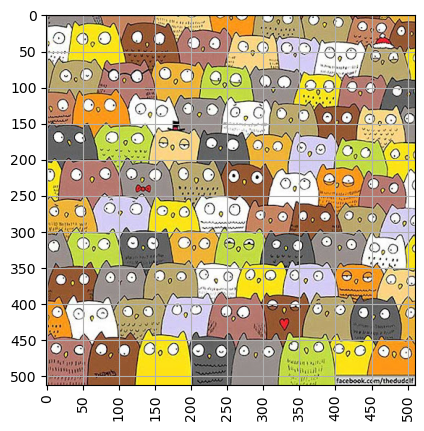

In [3]:
cat_jpg = cv2.imread('cat.jpg')
cat_jpg = cv2.cvtColor(cat_jpg, cv2.COLOR_BGR2RGB)
plt.imshow(cat_jpg)
plt.xticks(range(0, cat_jpg.shape[1], 50), rotation=90)
plt.yticks(range(0, cat_jpg.shape[0], 50))
plt.grid(True)
plt.show()

cat_jpg_rgb = cat_jpg.copy()
cat_jpg = cv2.cvtColor(cat_jpg, cv2.COLOR_RGB2GRAY)

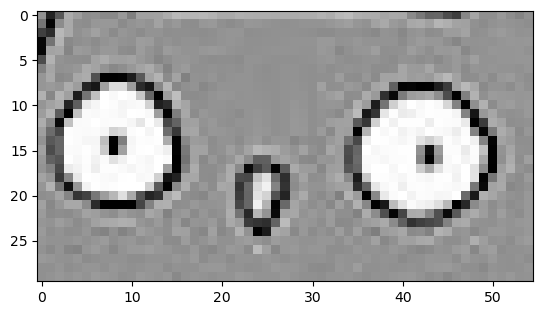

In [4]:
# [y1, y2, x1, x2]
coordinates = [450, 480, 265, 320]
cat_1 = create_object_img(cat_jpg, coordinates, 1, 300, 200)

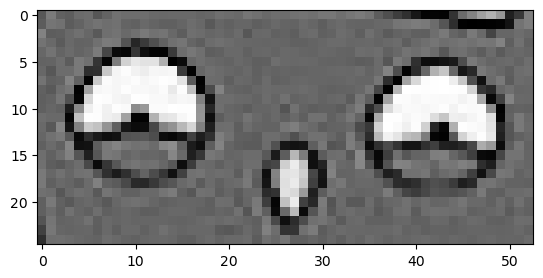

In [5]:
# [y1, y2, x1, x2]
coordinates = [390, 415, 302, 355]
cat_2 = create_object_img(cat_jpg, coordinates, 1, 300, 200)

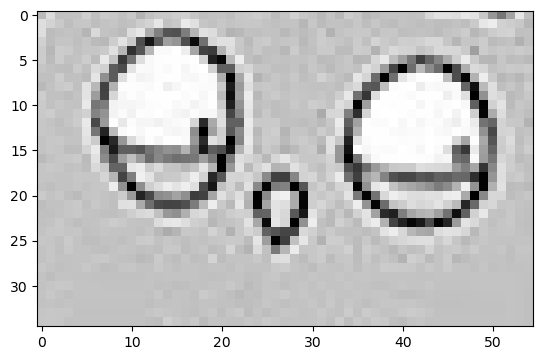

In [6]:
# [y1, y2, x1, x2]
coordinates = [75, 110, 220, 275]
cat_3 = create_object_img(cat_jpg, coordinates, 1, 300, 200)

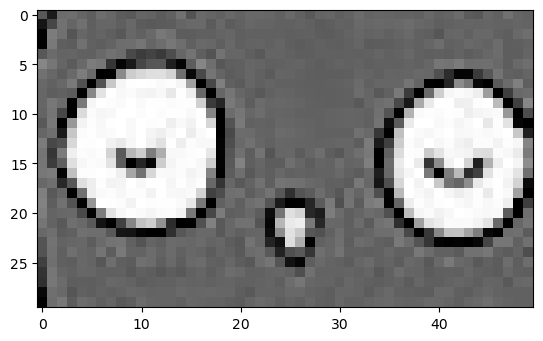

In [7]:
# [y1, y2, x1, x2]
coordinates = [450, 480, 200, 250]
cat_4 = create_object_img(cat_jpg, coordinates, 1, 300, 200)

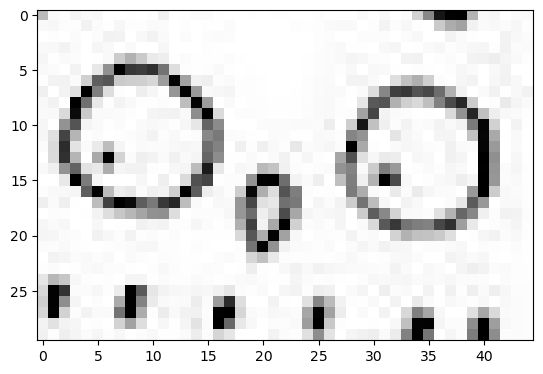

In [8]:
# [y1, y2, x1, x2]
coordinates = [310, 340, 445, 490]
cat_5 = create_object_img(cat_jpg, coordinates, 1, 300, 200)

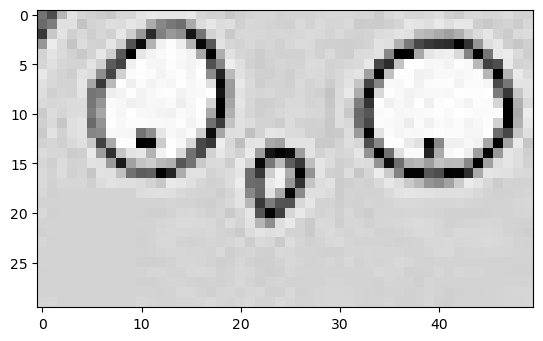

In [9]:
# [y1, y2, x1, x2]
coordinates = [350, 380, 270, 320]
cat_6 = create_object_img(cat_jpg, coordinates, 1, 300, 200)

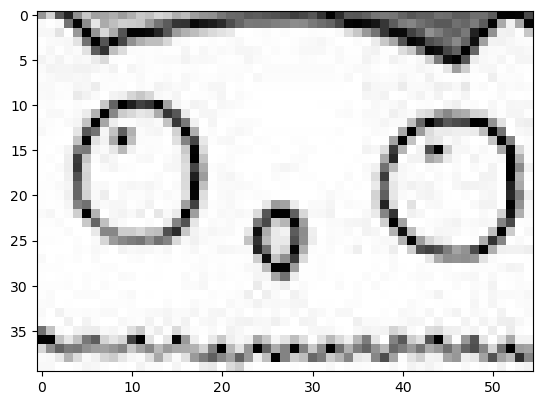

In [10]:
# [y1, y2, x1, x2]
coordinates = [250, 290, 215, 270]
cat_7 = create_object_img(cat_jpg, coordinates, 1, 300, 200)

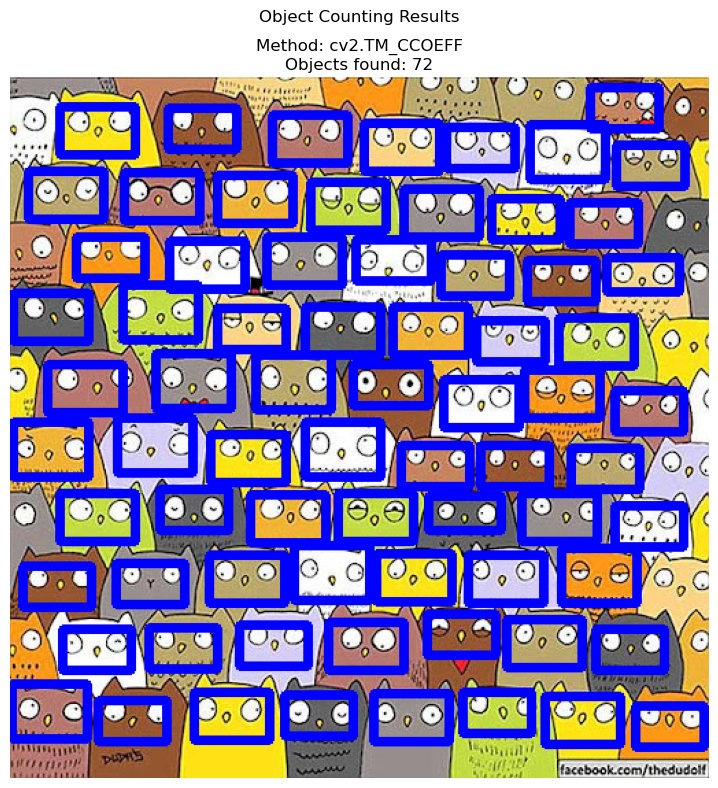

In [11]:
methods = [
    cv2.TM_CCOEFF_NORMED
    ]

templates = [cat_1, cat_2, cat_3, cat_4, cat_5, cat_6, cat_7]
counting_object(img_finding=cat_jpg, img_finding_rgb=cat_jpg_rgb, templates=templates, methods=methods, threshold=0.22, overlapThresh=0.05)


# Counting boot

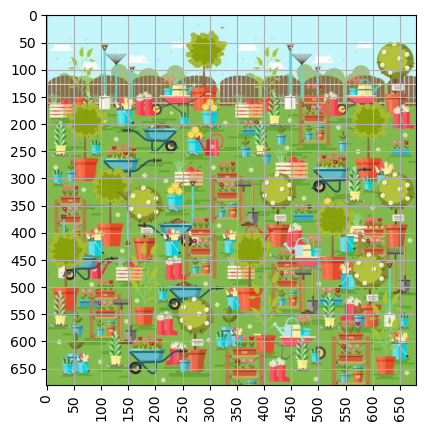

In [12]:
boot_jpg = cv2.imread('pair_boot.jpg')
boot_jpg = cv2.cvtColor(boot_jpg, cv2.COLOR_BGR2RGB)
plt.imshow(boot_jpg)
plt.xticks(range(0, boot_jpg.shape[1], 50), rotation=90)
plt.yticks(range(0, boot_jpg.shape[0], 50))
plt.grid(True)
plt.show()

boot_jpg_rgb = boot_jpg.copy()
boot_jpg = cv2.cvtColor(boot_jpg, cv2.COLOR_RGB2GRAY)

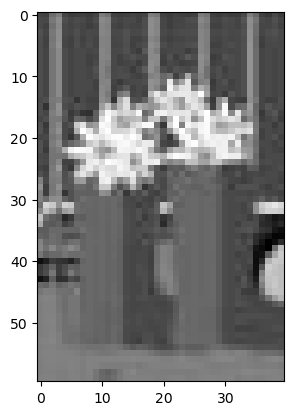

In [13]:
# [y1, y2, x1, x2]
coordinates = [130, 190, 160, 200]
boot_1 = create_object_img(boot_jpg, coordinates, 1, 300, 200)

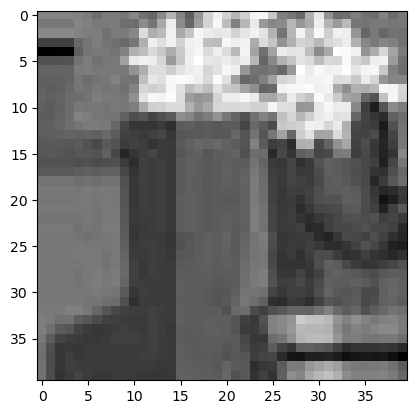

In [14]:
# [y1, y2, x1, x2]
coordinates = [520, 560, 540, 580]
boot_2 = create_object_img(boot_jpg, coordinates, 1, 300, 200)

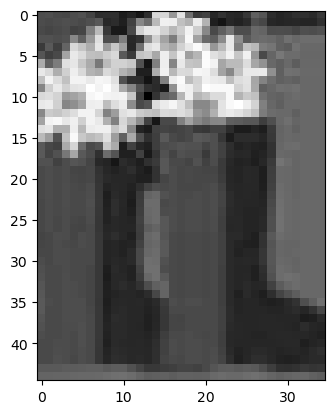

In [15]:
# [y1, y2, x1, x2]
coordinates = [165, 210, 640, 675]
boot_3 = create_object_img(boot_jpg, coordinates, 1, 300, 200)

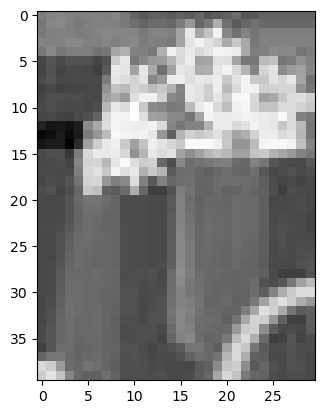

In [16]:
# [y1, y2, x1, x2]
coordinates = [380, 420, 440, 470]
boot_4 = create_object_img(boot_jpg, coordinates, 1, 300, 200)

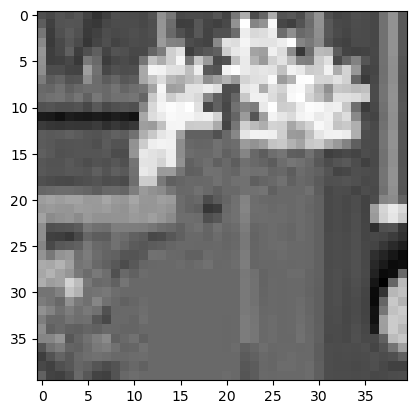

In [17]:
# [y1, y2, x1, x2]
coordinates = [140, 180, 500, 540]
boot_5 = create_object_img(boot_jpg, coordinates, 1, 300, 200)

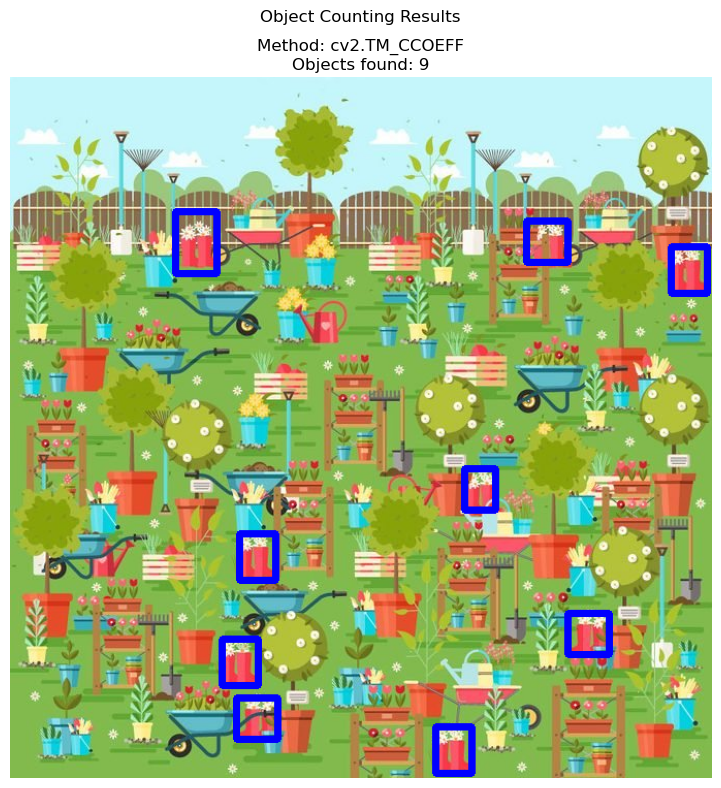

In [18]:
methods = [
    cv2.TM_CCOEFF_NORMED
    ]

templates = [boot_1, boot_2, boot_3, boot_4, boot_5]

counting_object(img_finding=boot_jpg, img_finding_rgb=boot_jpg_rgb, templates=templates, methods=methods, threshold=0.4, overlapThresh=0.)


# Counting rabbit

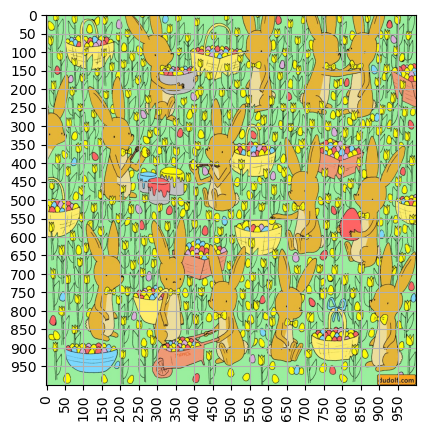

In [19]:
rabbit_jpg = cv2.imread('rabbit.jpeg')
rabbit_jpg = cv2.cvtColor(rabbit_jpg, cv2.COLOR_BGR2RGB)
plt.imshow(rabbit_jpg)
plt.xticks(range(0, rabbit_jpg.shape[1], 50), rotation=90)
plt.yticks(range(0, rabbit_jpg.shape[0], 50))
plt.grid(True)
plt.show()

rabbit_jpg_rgb = rabbit_jpg.copy()
rabbit_jpg = cv2.cvtColor(rabbit_jpg, cv2.COLOR_RGB2GRAY)

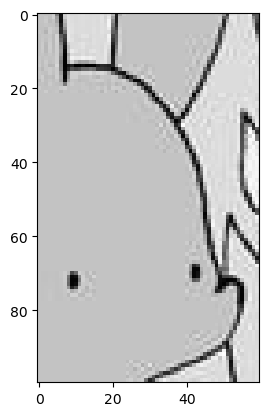

In [20]:
# [y1, y2, x1, x2]
coordinates = [250, 350, 0, 60]
rabbit_1 = create_object_img(rabbit_jpg, coordinates, 1, 300, 200)

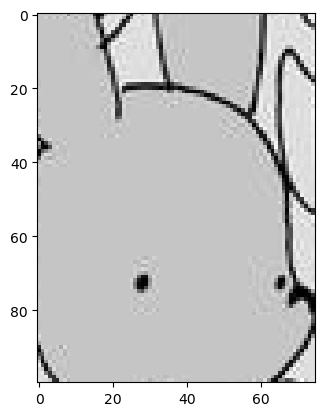

In [21]:
# [y1, y2, x1, x2]
coordinates = [630, 730, 135, 210]
rabbit_2 = create_object_img(rabbit_jpg, coordinates, 1, 300, 200)

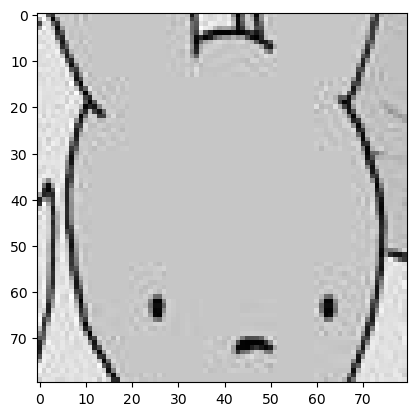

In [22]:
# [y1, y2, x1, x2]
coordinates = [650, 730, 300, 380]
rabbit_3 = create_object_img(rabbit_jpg, coordinates, 1, 300, 200)

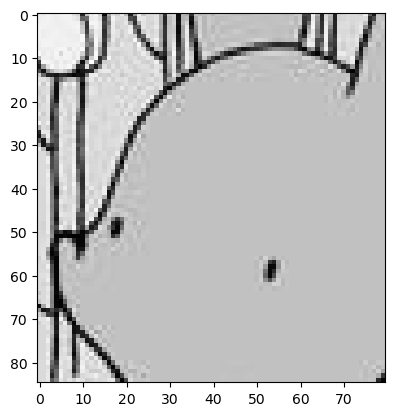

In [23]:
# [y1, y2, x1, x2]
coordinates = [720, 805, 870, 950]
rabbit_4 = create_object_img(rabbit_jpg, coordinates, 1, 300, 200)

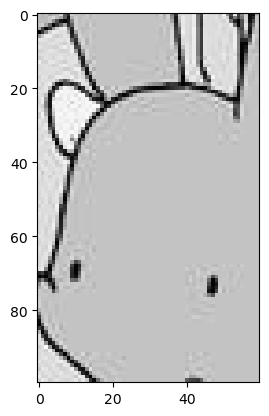

In [24]:
# [y1, y2, x1, x2]
coordinates = [700, 800, 440, 500]
rabbit_5 = create_object_img(rabbit_jpg, coordinates, 1, 300, 200)

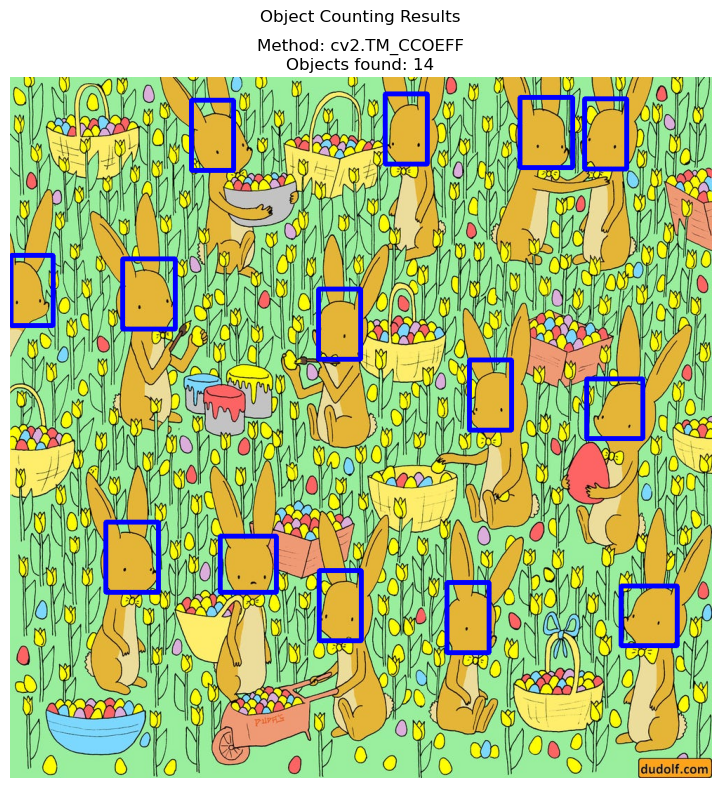

In [25]:
methods = [
    cv2.TM_CCOEFF_NORMED
    ]

templates = [rabbit_1, rabbit_2, rabbit_3, rabbit_4, rabbit_5]
counting_object(img_finding=rabbit_jpg, img_finding_rgb=rabbit_jpg_rgb, templates=templates, methods=methods, threshold=0.2, overlapThresh=0.2)

# Counting rabbit 2

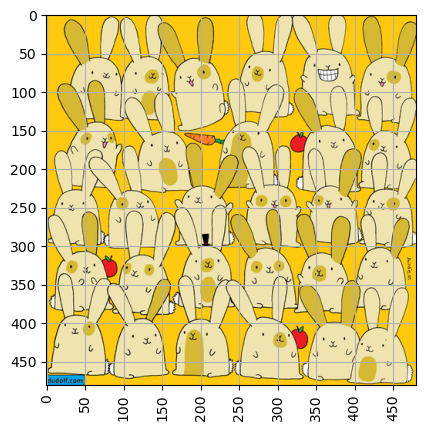

In [26]:
rabbit2_jpg = cv2.imread('rabbit2.png')
rabbit2_jpg = cv2.cvtColor(rabbit2_jpg, cv2.COLOR_BGR2RGB)
plt.imshow(rabbit2_jpg)
plt.xticks(range(0, rabbit2_jpg.shape[1], 50), rotation=90)
plt.yticks(range(0, rabbit2_jpg.shape[0], 50))
plt.grid(True)
plt.show()

rabbit2_jpg_rgb = rabbit2_jpg.copy()
rabbit2_jpg = cv2.cvtColor(rabbit2_jpg, cv2.COLOR_RGB2GRAY)

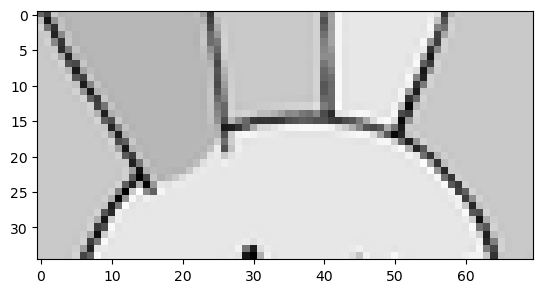

In [27]:
# [y1, y2, x1, x2]
coordinates = [40, 75, 30, 100]
rabbit_1 = create_object_img(rabbit2_jpg, coordinates, 1, 300, 200)

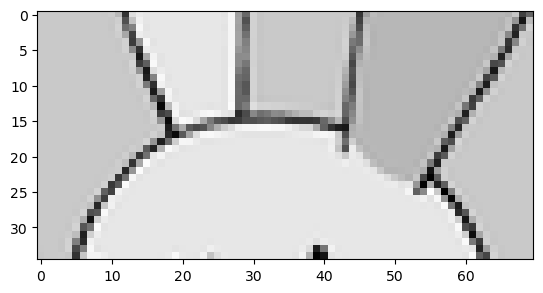

In [28]:
rabbit_2 = cv2.flip(rabbit_1, 1)

plt.imshow(rabbit_2, cmap='gray')
plt.show()


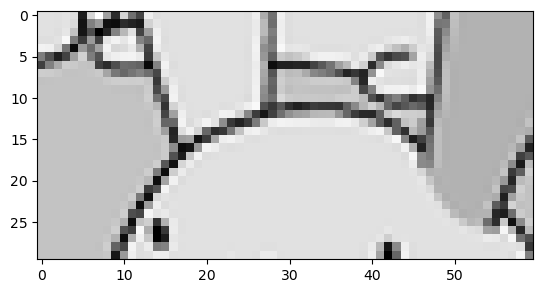

In [29]:
# [y1, y2, x1, x2]
coordinates = [290, 320, 400, 460]
rabbit_3 = create_object_img(rabbit2_jpg, coordinates, 1, 300, 200)

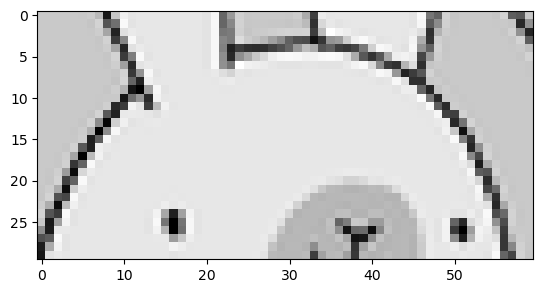

In [30]:
# [y1, y2, x1, x2]
coordinates = [50, 80, 100, 160]
rabbit_4 = create_object_img(rabbit2_jpg, coordinates, 1, 300, 200)

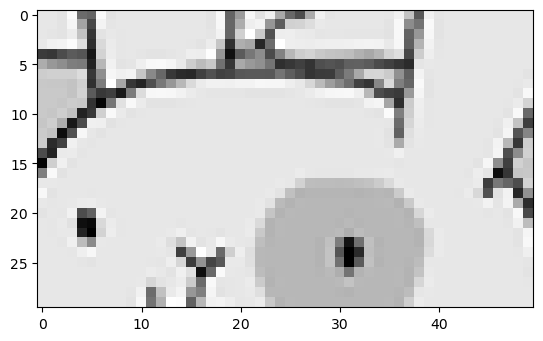

In [31]:
# [y1, y2, x1, x2]
coordinates = [220, 250, 420, 470]
rabbit_5 = create_object_img(rabbit2_jpg, coordinates, 1, 300, 200)

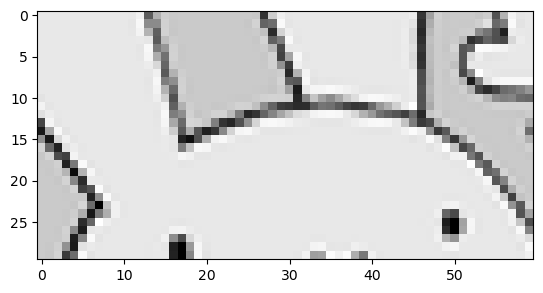

In [32]:
# [y1, y2, x1, x2]
coordinates = [140, 170, 120, 180]
rabbit_6 = create_object_img(rabbit2_jpg, coordinates, 1, 300, 200)

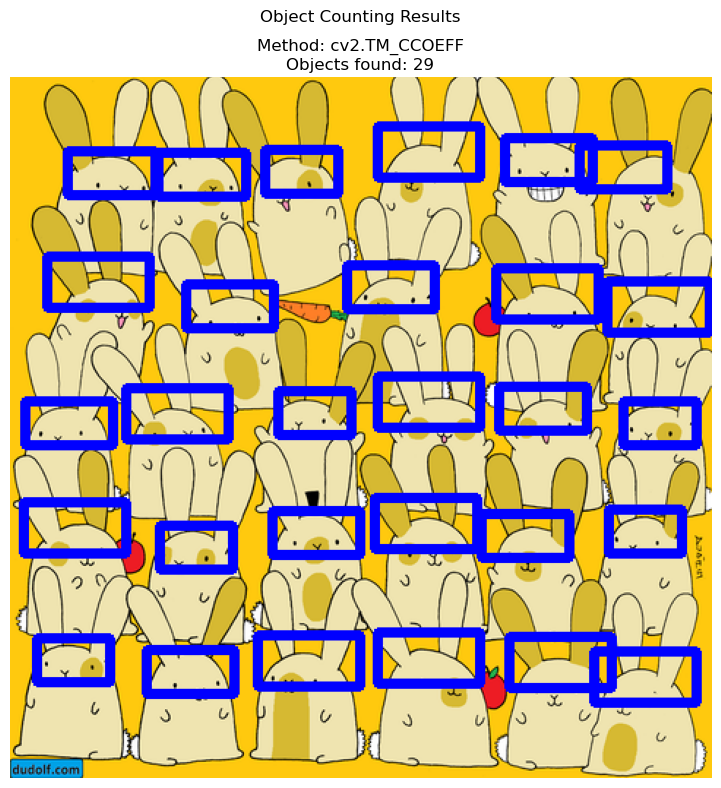

In [33]:
methods = [
    cv2.TM_CCOEFF_NORMED
    ]

templates = [rabbit_1, rabbit_2, rabbit_3, rabbit_4, rabbit_5, rabbit_6]
counting_object(img_finding=rabbit2_jpg, img_finding_rgb=rabbit2_jpg_rgb, templates=templates, methods=methods, threshold=0.21, overlapThresh=0.15)


# Counting mouse

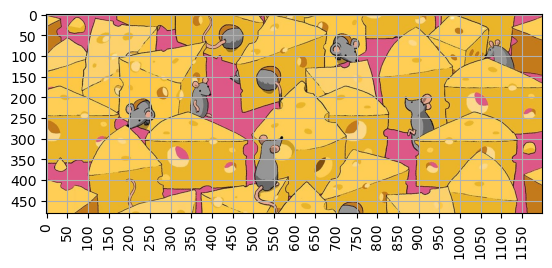

In [34]:
mouse_jpg = cv2.imread('mouse.jpg')[150:, :]
mouse_jpg = cv2.cvtColor(mouse_jpg, cv2.COLOR_BGR2RGB)
plt.imshow(mouse_jpg)
plt.xticks(range(0, mouse_jpg.shape[1], 50), rotation=90)
plt.yticks(range(0, mouse_jpg.shape[0], 50))
plt.grid(True)
plt.show()

mouse_jpg_hsv = cv2.cvtColor(mouse_jpg, cv2.COLOR_RGB2HSV)
mouse_jpg_rgb = mouse_jpg.copy()
mouse_jpg = cv2.cvtColor(mouse_jpg, cv2.COLOR_RGB2GRAY)

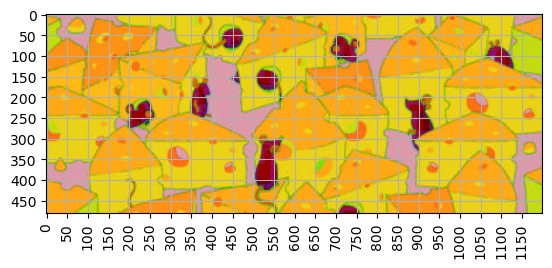

In [35]:
plt.imshow(mouse_jpg_hsv[:,:,::-1])
plt.xticks(range(0, mouse_jpg.shape[1], 50), rotation=90)
plt.yticks(range(0, mouse_jpg.shape[0], 50))
plt.grid(True)
plt.show()

In [36]:
lower_gray = np.array([0, 0, 0])
upper_gray = np.array([180, 100, 255])

mask = cv2.inRange(mouse_jpg_hsv, lower_gray, upper_gray)

contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

min_area = 400

num_brown_red_objects = sum(1 for contour in contours if cv2.contourArea(contour) > min_area)

print(f"Số lượng đối tượng màu nâu đỏ (sau khi lọc kích thước): {num_brown_red_objects}")


Số lượng đối tượng màu nâu đỏ (sau khi lọc kích thước): 10


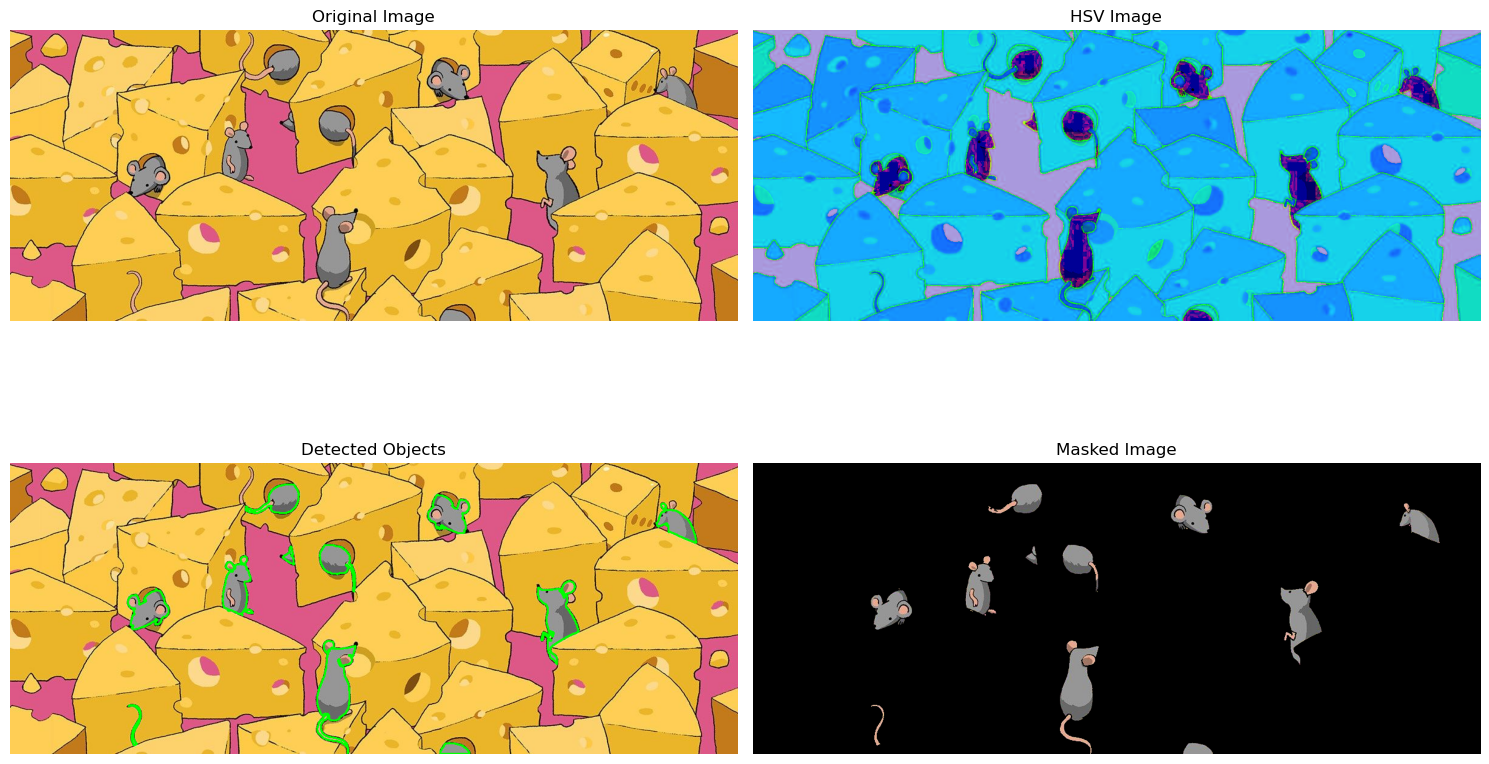

Số lượng chuột trong ảnh: 10


In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


visualization = mouse_jpg_rgb.copy()

filtered_contours = [contour for contour in contours if cv2.contourArea(contour) > 150]
cv2.drawContours(visualization, filtered_contours, -1, (0, 255, 0), 2)

filtered_mask = np.zeros(mask.shape, dtype=np.uint8)
cv2.drawContours(filtered_mask, filtered_contours, -1, 255, -1)
masked_image = cv2.bitwise_and(mouse_jpg_rgb, mouse_jpg_rgb, mask=filtered_mask)

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Original image
axs[0, 0].imshow(mouse_jpg_rgb)
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

# HSV image
axs[0, 1].imshow(mouse_jpg_hsv)
axs[0, 1].set_title('HSV Image')
axs[0, 1].axis('off')

# Visualization with contours
axs[1, 0].imshow(visualization)
axs[1, 0].set_title('Detected Objects')
axs[1, 0].axis('off')

# Masked image
axs[1, 1].imshow(masked_image)
axs[1, 1].set_title('Masked Image')
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

print(f"Số lượng chuột trong ảnh: {num_brown_red_objects}")